# Lecture 1:  Numerical Integrals and Derivatives

**Overview:**
* Numerical integration.
* Numerical derivatives.
---

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate  # MUST BE RUNNING PHYS 1600 kernel

### Functions to integrate, and some exact results

In [53]:
def Gaussian(x,amp,mean,std_dev):
    """
    A Gaussian function,unnormalized
    """
    f = amp*np.exp(-1*((x - mean)**2/(2*std_dev**2))) 
    return f

def polynomial(x,*args):
    
    """
    A general polynomial the order of which is determined by the size
    of the array of coefficients
    Arguments:
    x -- vector of x values
    args -- an array of coeficients, the size of this array determines the order
    of the polynomial
    example: polynomial(x,2,3) will generate the line: f(x) = 2 + 3x
    or 
    polynomial(x,1,0,0.1) will generate: f(x) = 1 +0.1*x^2, fixed conflicts
    """
    f = 0*x
    for (i,a) in enumerate(args):
        f += a*x**(i)
    
    return f


def Fermi(x):
    """
    Define a function from physics that might give numerical integrators or differentiators
    some trouble
    """
    num = 1/np.sqrt(x)
    den = np.exp(x)+1
    return num/den


# add white noise to a function
def add_noise(A,f):
    """
    Adds white (Gaussian distributed) noise to a function
    
    Arguments:
    A -- width of the noise distribution, think of it like the amplitude of the noise
    f - an array of values to add noise to, these represent some function 
    """
    
    noise = np.random.normal(0,A,np.size(f))
    
    return f + noise

def MODIFIED_function(x):
    # there was something wrong, fix it
    y = x + 44
    return y
    

### Define a set of methods for taking numerical integrals. 

In [54]:
# Numerical Integration methods

def riemannSum(f, start, stop, N):
    """
    A simple riemann sum integrator
    
    Arguments:
    f - A function to integrate, the function must take a single argument that is an independent
    variable
    start - lower limit of integral
    stop - upper limit of integral
    N - number of steps 
    """
    
    range = stop - start
    h = range/N
    x = np.arange(start, stop+h, h)

    return np.sum(f(x)) * h

def Simpson(f, start, stop, N):
    """
    A simple Simpson's rule integrator
    
    Arguments:
    f - A function to integrate, the function must take a single argument that is an independent
    variable
    start - lower limit of integral
    stop - upper limit of integral
    N - number of steps (must be an even number)
    """
    
    width = stop - start
    h = width/N
    x = np.arange(start, stop+h, h)
    
    s = f(start) + f(stop) 
    return (2*f(x[2:-2:2]).sum() + 4*f(x[1:-2:2]).sum()+s) * h/3


def adaptive_trapz(f,start, stop, epsilon):
    """
    Write an adaptive trapezoidal integrator here
    
    Arguments:
    f - a function to integrate, the function must take a single argument 
    """
    
    return 


### Define a set of methods for taking numerical derivatives.

In [55]:
#numerical derivatives

def forward_diff(x,f):
    """
    Take a derivative using the forward difference scheme
    Arguments:
    x - an array of independent values
    f - an array of dependent values i.e y = f(x)
    """
    d = (f[1:] - f[:-1])/np.diff(x)
    return d
    
def backward_diff(x,f):
    """
    Take a derivative using the backwards difference scheme
    Arguments:
    x - an array of independent values
    f - an array of dependent values i.e y = f(x)
    """
    d = (f[:-1] - f[1:])/np.diff(x)
    return d

# implement a central difference formula
def central_diff(x,f):
    d = 2+2
    d = 1
    return d

In [63]:
P = polynomial(x,0,5)
integral = riemannSum(P(x), 0, 30, 10)
print(integral)

TypeError: 'numpy.ndarray' object is not callable

### Tasks
1. Use the `riemannSum` and `Simpsons` methods above to integrate some polynomical functions of various orders. Try playing around with different numbers of steps. Can you obtain machine precision? 
2. Examine the help file for `integrate.trapz`, `integrate.simps`. and `integrate.quad`. Try comparing these routines to those you write yourself.
3. Write a method to perform an adaptive trapezoidal integral as discussed in the lectures. How does your method compare with scipy's `integrate.quad`? Can you obtain the same accuaracy? For a given accuarcy, what method is faster and/or what method requires more iterations?
4. Try adding noise to a function and then integrating. How does the addition of noise affect the precision of the integral?
5. Write a method to calculate numerical derivatives using central difference formulas. Compare the forward, backwards, and central difference methods for taking derivatives of various polynomials.
6. Simulate some experimental data by generating a periodic function (sin, cos, etc) time series and adding noise. Then try taking the derivative of this data using forward, backward, and central difference methods. Find the step size values where forward/backward difference methods become more accurate than a central difference method by comparing your numerical derivatives with the analytical results.

### Example usage of some functions above

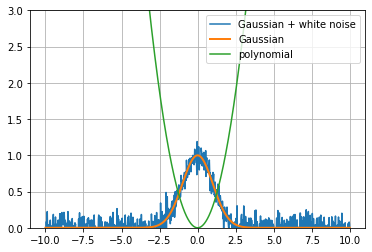

In [34]:
# Generate array of x-values
x = np.linspace(-10,10,1000)

# Generate Gaussian function, add noise, and plot
G = Gaussian(x, 1, 0,1)
P = polynomial(x,0,0,.3)
noisy_G = add_noise(0.1, G)
plt.plot(x, noisy_G, label = "Gaussian + white noise")
plt.plot(x, G, label = "Gaussian", lw = 2)
plt.plot(x, P, label = "polynomial")
plt.ylim(0,3)
plt.grid()
plt.legend()

In [35]:
# using Scipy's built in integration schemes
# integrate a Gaussian with mean=0, amplitude=1, and standard deviation of 1 
# over a range of -100 to 100
# there are many options and ouput arguments for this function
scipyIntegral = integrate.quad(Gaussian, -100.0, 100.0, args = (1,0,1))

# exact integral of a Gaussian: Amp 1, standard deviation = 1
analyticalIntegral = np.sqrt(2*np.pi)

# Integrate a gaussian
print("Exact integral = ", analyticalIntegral)
print("SciPy Integral = ", scipyIntegral[0], "+/-", scipyIntegral[1])

Exact integral =  2.5066282746310002
SciPy Integral =  2.506628274631001 +/- 2.592038461839533e-12
